In [83]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import tkinter 
import plotly.express as px 
from matplotlib import pyplot as plt 
from sklearn.model_selection import cross_val_score
from collections import Counter 


In [58]:
raw_train = pd.read_csv('train.csv', index_col='id')
raw_test = pd.read_csv('test.csv',index_col='id')
raw = pd.read_csv('creditcard.csv')

<h1>DATASET ATTRIBUTES</h1>
<p1>Dataset contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.</p1>
<col>
    <li>Id- A unique id for each row</li>
    <li>Time - Number of seconds elapsed between this transaction and the first transaction in the dataset </li>
    <li>V1-V28 - Features after dimensionality reduction to protect user identities and sensitive features</li>
    <li>Amount - Transaction amount</li>
    <li>Class - Target Class (1 for fraudulent transactions, 0 genuine)</li>
</col>


In [59]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219129 entries, 0 to 219128
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    219129 non-null  float64
 1   V1      219129 non-null  float64
 2   V2      219129 non-null  float64
 3   V3      219129 non-null  float64
 4   V4      219129 non-null  float64
 5   V5      219129 non-null  float64
 6   V6      219129 non-null  float64
 7   V7      219129 non-null  float64
 8   V8      219129 non-null  float64
 9   V9      219129 non-null  float64
 10  V10     219129 non-null  float64
 11  V11     219129 non-null  float64
 12  V12     219129 non-null  float64
 13  V13     219129 non-null  float64
 14  V14     219129 non-null  float64
 15  V15     219129 non-null  float64
 16  V16     219129 non-null  float64
 17  V17     219129 non-null  float64
 18  V18     219129 non-null  float64
 19  V19     219129 non-null  float64
 20  V20     219129 non-null  float64
 21  V21     21

In [60]:
raw_train.count()

Time      219129
V1        219129
V2        219129
V3        219129
V4        219129
V5        219129
V6        219129
V7        219129
V8        219129
V9        219129
V10       219129
V11       219129
V12       219129
V13       219129
V14       219129
V15       219129
V16       219129
V17       219129
V18       219129
V19       219129
V20       219129
V21       219129
V22       219129
V23       219129
V24       219129
V25       219129
V26       219129
V27       219129
V28       219129
Amount    219129
Class     219129
dtype: int64

<h2>TRAIN DATASET-OVERVIEW</h2>

In [61]:
raw_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [62]:
raw_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,...,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,62377.415376,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,-0.048337,...,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803,0.002140
std,25620.348569,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,1.054143,...,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017,0.046214
min,0.000000,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,-8.756951,...,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,0.000000,0.000000
25%,47933.000000,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,-0.711444,...,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000,0.000000
50%,63189.000000,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,-0.131323,...,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000,0.000000
75%,77519.000000,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,0.583715,...,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000,0.000000
max,120580.000000,2.430494,16.068473,6.145578,12.547997,34.581260,16.233967,39.824099,18.270586,13.423914,...,22.062945,6.163541,12.734391,4.572739,3.111624,3.402344,13.123618,23.263746,7475.000000,1.000000


<H3>TEST DATASET -OVERVIEW</H3>

In [63]:
raw_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
id,,,,,,,,,,,,,,,,,,,,,
219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,-0.230126,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,1.068183,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,-1.177858,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,2.079398,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,-0.281749,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98


In [64]:
raw_test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,...,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000
mean,144637.928166,0.512929,-0.013098,-0.697478,-0.273258,0.321856,-0.050204,0.073419,0.043803,-0.071620,...,-0.056678,0.044729,0.175461,0.018471,0.016029,-0.118352,-0.015199,0.006236,0.002035,66.182463
std,14258.025396,1.628455,1.247749,1.292522,1.365752,1.146215,1.332880,0.946681,0.749513,0.924996,...,0.458364,0.449017,0.710704,0.359597,0.633929,0.479720,0.446154,0.255935,0.174613,153.151535
min,120580.000000,-34.755944,-37.803827,-18.934952,-5.497560,-25.639591,-14.133040,-18.715915,-26.926164,-4.823352,...,-26.412867,-13.087263,-5.392649,-12.814296,-2.789084,-3.361564,-1.743223,-9.412538,-8.262339,0.000000
25%,132698.000000,-0.679988,-0.715885,-1.619268,-1.021205,-0.418547,-0.891441,-0.570042,-0.231824,-0.634695,...,-0.237529,-0.166715,-0.393667,-0.135059,-0.368957,-0.409938,-0.284914,-0.066037,-0.057447,5.990000
50%,144493.000000,0.285798,0.009058,-0.719060,-0.482945,0.306851,-0.372813,0.118545,0.014979,-0.075909,...,-0.096729,0.058393,0.250169,0.017835,0.029727,-0.142325,-0.069342,-0.003539,-0.026955,21.790000
75%,156140.000000,1.974015,0.827420,0.073874,0.369725,0.955997,0.302724,0.734503,0.296969,0.513770,...,0.065753,0.244817,0.749555,0.167514,0.562138,0.182937,0.216632,0.069334,0.066954,66.000000
max,172790.000000,2.452901,12.390128,4.492640,11.232928,24.352818,16.596635,27.023955,12.098322,7.888980,...,15.829261,15.333546,5.771245,17.481609,4.541724,4.555960,3.374748,12.673968,13.093229,4630.600000


<h4>Feature Distribution</h4>

C:\Users\admin\AppData\Local\Temp\ipykernel_244\2937188526.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


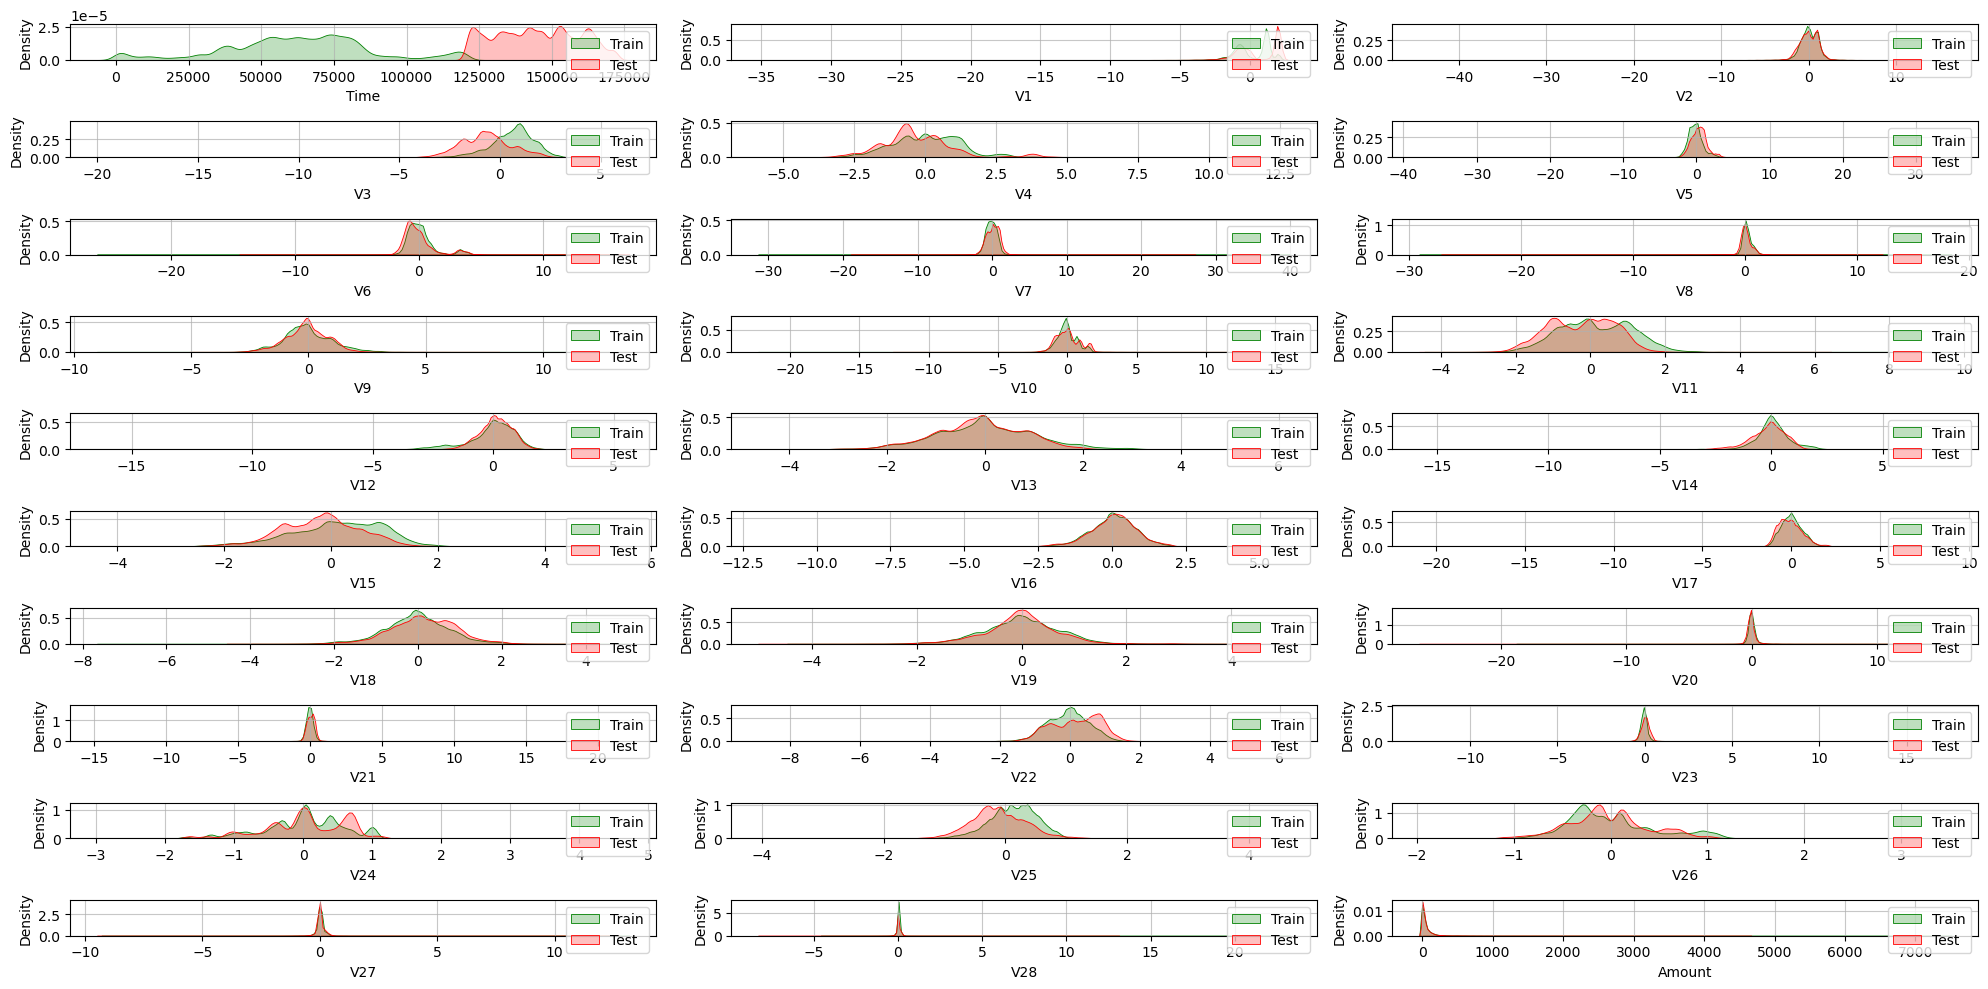

In [65]:
numeric_columns =(list(raw_train.loc[:,'Time':'Amount']))

fig = plt.figure(figsize=(20,10))
rows,cols = 10,3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows,cols,idx+1)
    ax.grid(alpha=0.7, axis='both')
    sns.kdeplot(x = num,fill = True, color='green',linewidth = 0.6, data = raw_train,label = 'Train')
    sns.kdeplot(x=num, fill = True, color='red',linewidth =0.6, data = raw_test,label = 'Test')
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()    

In [66]:
train_df = raw_train.drop('Time',axis=1)
test_df = raw_test.drop('Time',axis=1)

<h5>Data imbalance check</h5>

In [67]:
palette = ["#ADD8E6","#EFB000"]

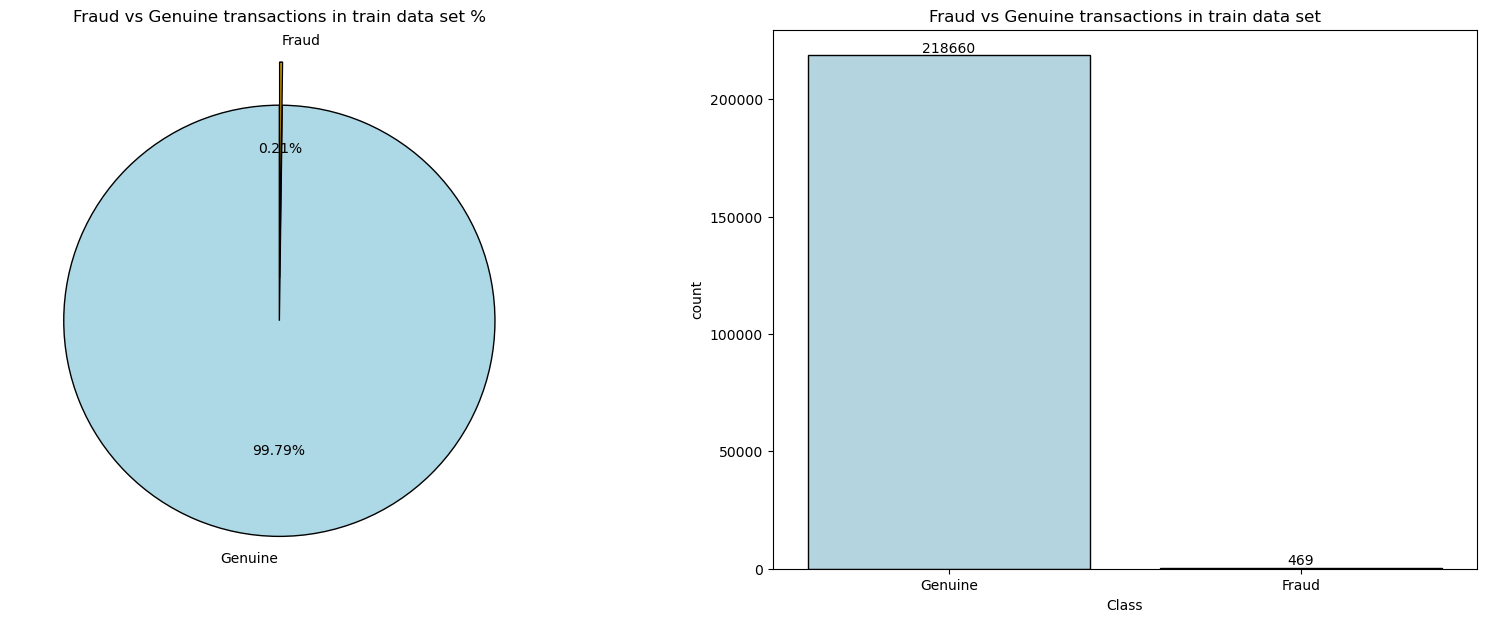

In [68]:
l1 = list(train_df['Class'].value_counts())
pie_values = [l1[0]/sum(l1)*100,l1[1]/sum(l1)*100]

fig = plt.subplots(nrows = 1, ncols=2,figsize = (20,7))
plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['Genuine','Fraud'],autopct='%1.2f%%',startangle=90,explode=(0.1,0.1),colors = palette, wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title('Fraud vs Genuine transactions in train data set %');
plt.subplot(1,2,2)
ax= sns.countplot(data = train_df,x='Class',palette=palette,edgecolor ='black')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['Genuine','Fraud'])

plt.title('Fraud vs Genuine transactions in train data set')
plt.show()

<h7>Checking for  outlier train dataset</h7>

In [69]:
numeric_columns =(list(raw_train.loc[:,'V1':'Amount']))
print(numeric_columns)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


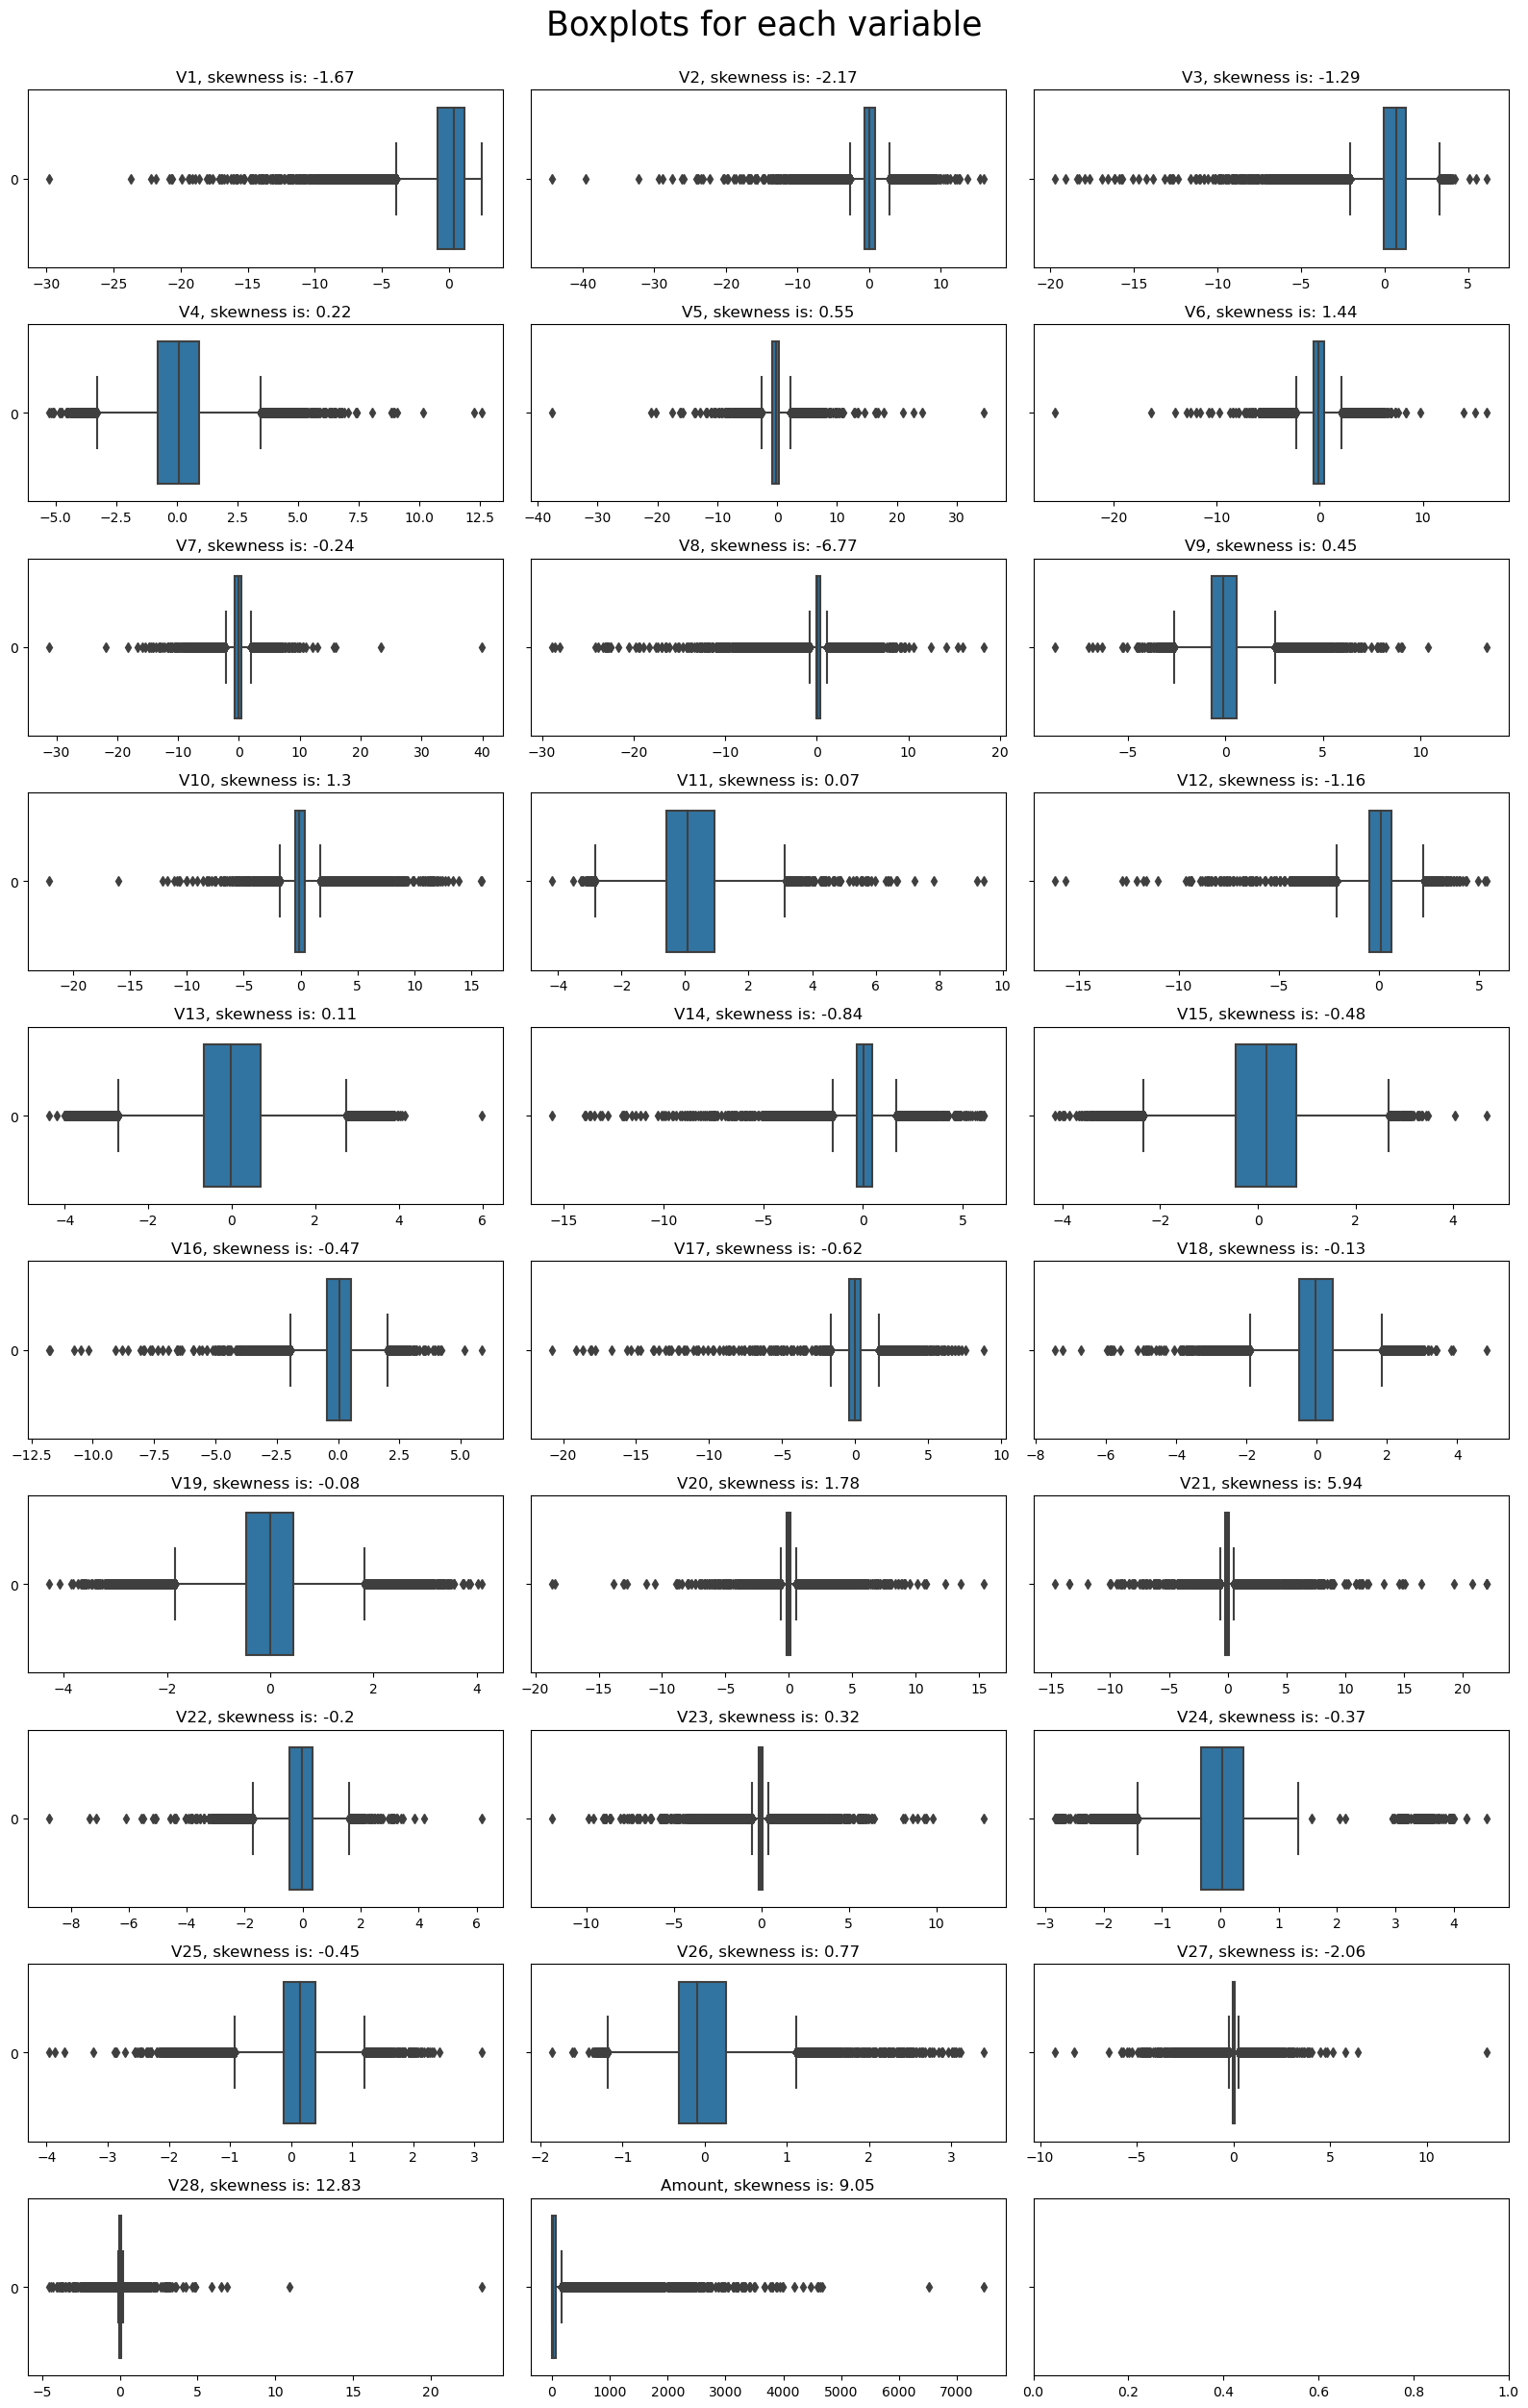

In [70]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=train_df, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

<h8>Tukey's IQR method</h8>

In [71]:
def IQR_method (df,n,features):
    
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [72]:
Outlier_IOR = IQR_method(train_df,1,numeric_columns)
df_out = train_df.drop(Outlier_IOR,axis=0).reset_index(drop=True)

Total number of deleted outliers is: 20617


In [73]:
print ('The amount of frauds in df before dropping outliers: ', len(train_df[train_df['Class'] == 1]))
print ('The amount of frauds in df after dropping outliers: ', len(df_out[df_out['Class'] == 1]))

The amount of frauds in df before dropping outliers:  469
The amount of frauds in df after dropping outliers:  188


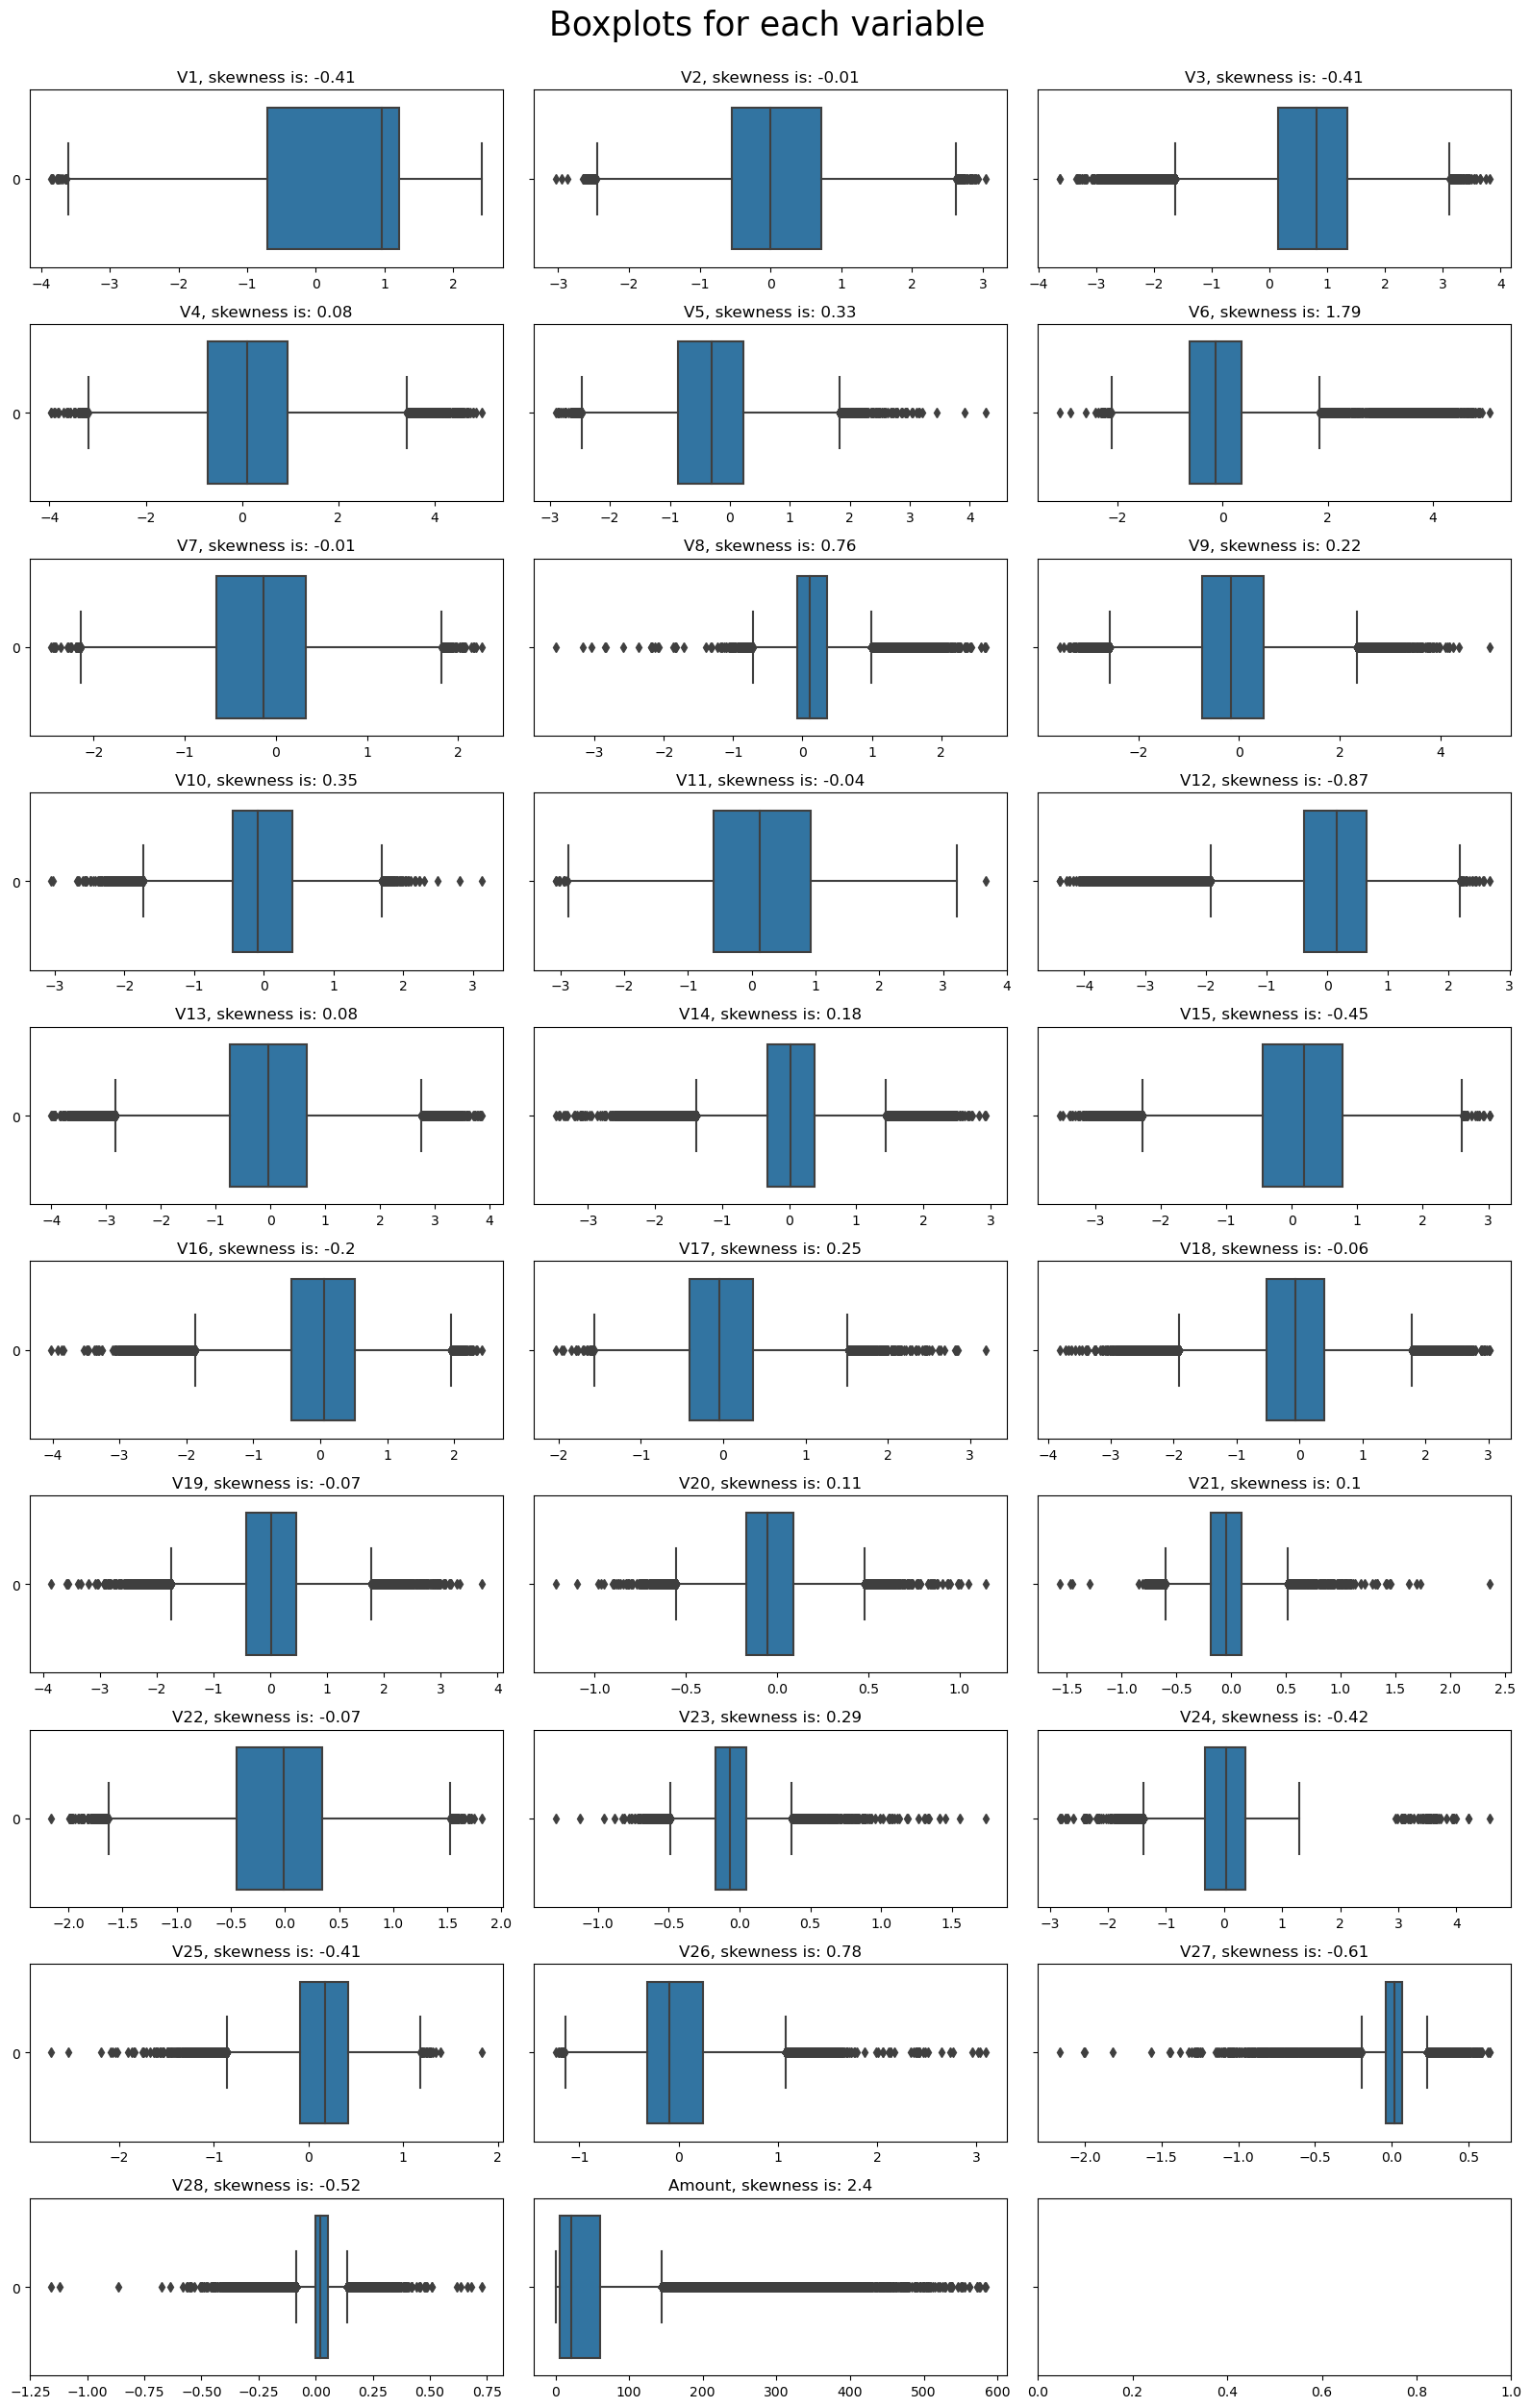

In [74]:
boxplots_custom(dataset=df_out, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

<h>Dealing with duplicated values</h>

In [88]:
print('Number of duplicated values in dataset: ', train_df.duplicated().sum())

Number of duplicated values in dataset:  94


In [89]:
df = train_df.copy()

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


In [90]:
print ('The amount of frauds in df before dropping duplicates: ', len(train_df[train_df['Class'] == 1]))
print ('The amount of frauds in df after dropping duplicates: ', len(df[df['Class'] == 1]))

The amount of frauds in df before dropping duplicates:  469
The amount of frauds in df after dropping duplicates:  469


<h>Correlations</h>

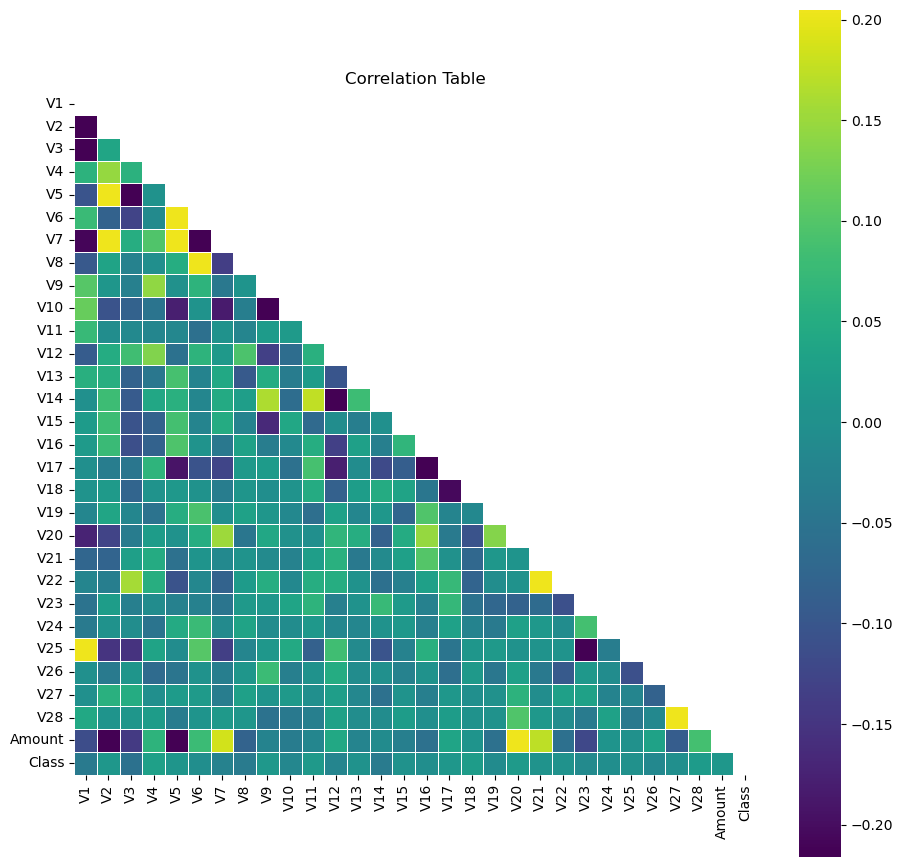

In [91]:
plt.figure(figsize = (11,11))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, cmap="viridis",linewidths = .6)
plt.title('Correlation Table')
plt.show()

In [93]:
df = raw.copy()

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


In [95]:
df = df.drop('Time', axis=1)

<h>Train test split - you could have been splitting your dataset all wrong</h>

In [96]:
X = df.drop('Class', axis=1)
y = df['Class']

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [98]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [99]:
col_names = ['Amount']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

In [100]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#We are going to ensure that we have the same splits of the data every time. 
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False)

In [101]:
rf = RandomForestClassifier(n_estimators=100, random_state=13)
#cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')

In [102]:
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.8030303  0.74242424 0.76119403 0.87878788 0.65151515]
Average Cross Validation Recall score: 0.7673903211216644


<h>Hyperparameter Tuning Using GridSearchCV</h>

In [103]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

grid_rf = GridSearchCV(rf, param_grid=params, cv=kf, 
                          scoring='recall').fit(X_train, y_train)

In [104]:
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': 12, 'n_estimators': 100, 'random_state': 13}
Best score: 0.7734509271822705


In [107]:
y_pred = grid_rf.predict(X_test)


In [108]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm = confusion_matrix(y_test, y_pred)

rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[84972     4]
 [   33   109]]


In [109]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.767606,0.964602,0.854902,0.999565
